In [1]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    '/content/drive/My Drive/cats_vs_dogs_small/train',
    image_size = (180 , 180),
    batch_size =32
)

valdation_dataset = image_dataset_from_directory(
    '/content/drive/My Drive/cats_vs_dogs_small/validation',
    image_size = (180 , 180),
    batch_size =32
)

test_dataset = image_dataset_from_directory(
    '/content/drive/My Drive/cats_vs_dogs_small/test',
    image_size = (180 , 180),
    batch_size =32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2017 files belonging to 2 classes.


In [2]:
from tensorflow.python.eager.backprop import flatten_nested_indexed_slices
from tensorflow import keras

conv_base = keras.applications.vgg16.VGG16(
    weights ='imagenet',
    include_top = False)

conv_base.trainable= False




58889256/58889256 [==============================] - 0s 0us/step


In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [4]:
conv_base.trainable = True

print(len(conv_base.trainable_weights))

26


In [5]:
conv_base.trainable = False

print(len(conv_base.trainable_weights))

0


In [7]:
from keras import layers

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

inputs = keras.Input(shape = (180, 180 ,3))

x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)

x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1 , activation = "sigmoid")(x)

model = keras.Model(inputs , outputs)

model.compile (loss = "binary_crossentropy" ,
               optimizer = 'rmsprop' ,
               metrics= ["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "feturesWithAug.keras",
        save_best_only = True,
        monitor = "val_loss"
    )


]


In [9]:
history = model.fit (
    train_dataset,
    epochs= 50,
    validation_data = valdation_dataset,
    callbacks = callbacks)



Epoch 1/50


63/63 [==============================] - 426s 6s/step - loss: 21.9355 - accuracy: 0.9000 - val_loss: 13.0559 - val_accuracy: 0.9290
Epoch 2/50
63/63 [==============================] - 19s 299ms/step - loss: 6.6789 - accuracy: 0.9495 - val_loss: 3.3168 - val_accuracy: 0.9730
Epoch 3/50
63/63 [==============================] - 20s 313ms/step - loss: 4.9564 - accuracy: 0.9605 - val_loss: 3.1434 - val_accuracy: 0.9770
Epoch 4/50
63/63 [==============================] - 19s 300ms/step - loss: 5.8143 - accuracy: 0.9595 - val_loss: 5.0746 - val_accuracy: 0.9680
Epoch 5/50
63/63 [==============================] - 20s 314ms/step - loss: 3.6905 - accuracy: 0.9715 - val_loss: 4.3628 - val_accuracy: 0.9760
Epoch 6/50
63/63 [==============================] - 19s 302ms/step - loss: 2.2512 - accuracy: 0.9760 - val_loss: 4.1835 - val_accuracy: 0.9710
Epoch 7/50
63/63 [==============================] - 20s 309ms/step - loss: 2.7537 - accuracy: 0.9790 - val_loss: 6.2294 - val_accuracy: 0.9750
Epoch 8/50

In [14]:
conv_base.trainable = True

for layer in conv_base.layers[:-4]:
  layer.trainable = False


model.compile(loss = 'binary_crossentropy',
              optimizer = keras.optimizers.RMSprop(learning_rate =1e-5),
              metrics = ["accuracy"])





In [15]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "feturesWithFineTuning.keras",
        save_best_only = True,
        monitor = "val_loss"
    )


]


history = model.fit (
    train_dataset,
    epochs= 50,
    validation_data = valdation_dataset,
    callbacks = callbacks)

Epoch 1/50


63/63 [==============================] - 26s 318ms/step - loss: 3.8415 - accuracy: 0.9665 - val_loss: 2.2890 - val_accuracy: 0.9840
Epoch 2/50
63/63 [==============================] - 22s 325ms/step - loss: 1.7756 - accuracy: 0.9760 - val_loss: 2.0199 - val_accuracy: 0.9810
Epoch 3/50
63/63 [==============================] - 23s 353ms/step - loss: 1.8335 - accuracy: 0.9800 - val_loss: 2.1846 - val_accuracy: 0.9760
Epoch 4/50
63/63 [==============================] - 21s 323ms/step - loss: 0.9412 - accuracy: 0.9830 - val_loss: 1.7162 - val_accuracy: 0.9790
Epoch 5/50
63/63 [==============================] - 21s 328ms/step - loss: 0.9515 - accuracy: 0.9830 - val_loss: 1.9783 - val_accuracy: 0.9800
Epoch 6/50
63/63 [==============================] - 22s 346ms/step - loss: 0.9015 - accuracy: 0.9855 - val_loss: 1.9533 - val_accuracy: 0.9780
Epoch 7/50
63/63 [==============================] - 20s 313ms/step - loss: 0.5758 - accuracy: 0.9875 - val_loss: 1.9821 - val_accuracy: 0.9760
Epoch 8/50

In [16]:
test_loss , test_acc = model.evaluate(test_dataset)
print(test_loss  , test_acc)

64/64 [==============================] - 276s 4s/step - loss: 2.8447 - accuracy: 0.9772
2.8447206020355225 0.9771938323974609


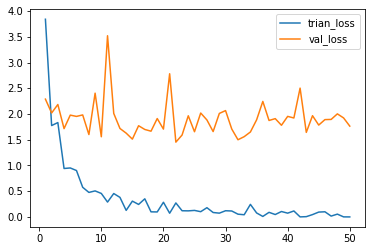

In [18]:
import matplotlib.pyplot as plt
epochs = range(1, len(history.history["loss"])+1)

loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.figure()
plt.plot(epochs , loss , label = "trian_loss")
plt.plot(epochs , val_loss , label = "val_loss")
plt.legend()